# Autocorrelação

**Autocorrelação** é a correlação, da mesma variável (com os mesmos dados), de determinados períodos anteriores com o período atual. Todo período com esse tipo de correlação é denominado de **lag**. O teste de autocorrelação é de suma importancia para a definição do modelo

Primeiro caso: dados aleatórios normalizados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [10]:
np.random.seed(6)
dados = np.random.normal(0,1,72)
ano = range(1950,2022)

72

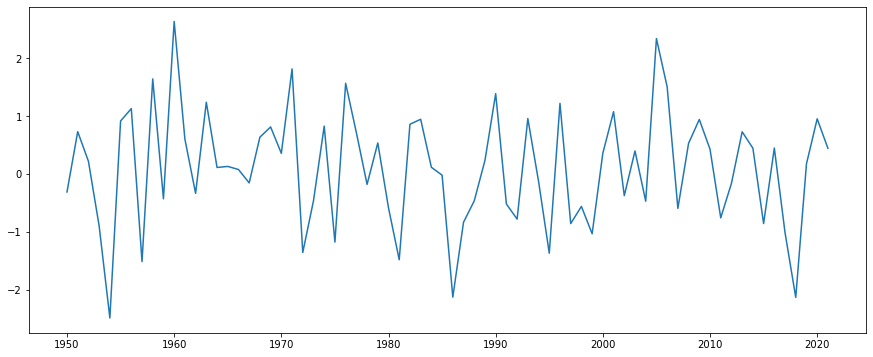

In [11]:
serie = pd.Series(dados, index = ano)
serie.plot()
plt.show()

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Função de Autocorrelação e Função de Autocorrelação Parcial

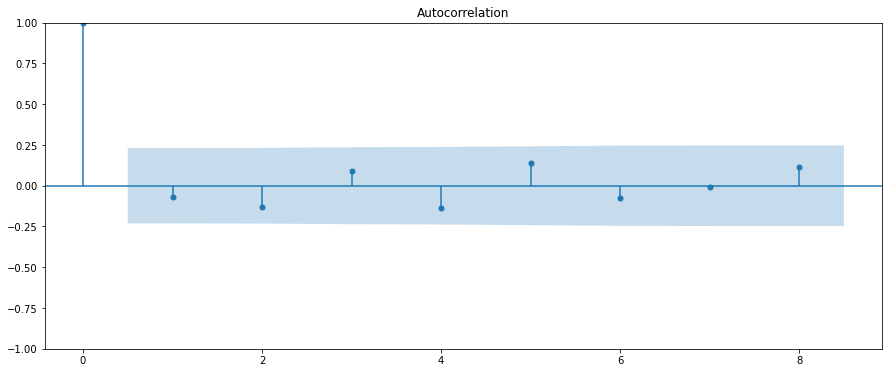

In [16]:
plot_acf(serie, lags=8)
plt.show()

Oito lags, ou seja, oito tentativas de períodos com tipo de correlação com a própria variável aleatória. A faixa em azul representa o intervalo de confiança, portanto, se estiver dentro do IC, não haverá significância estatística entre correlação com esses períodos.

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


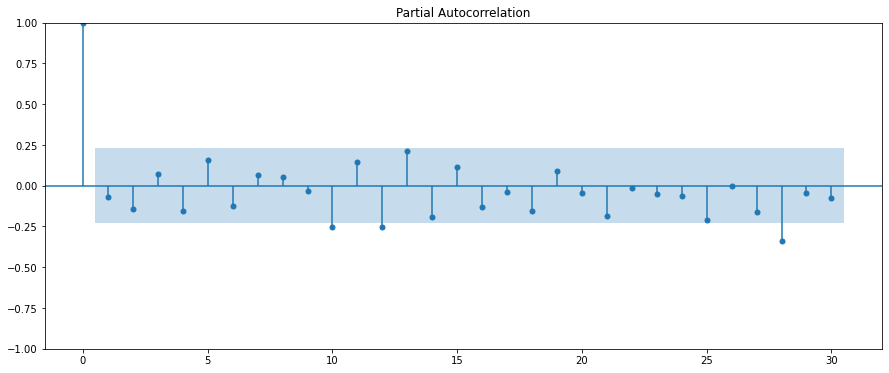

In [17]:
plot_pacf(serie, lags=30)
plt.show()

O PACF (ou Função de Autocorrelação Parcial) não analisa os dados automaticamente anteriores, ou seja, ele analisa, por exemplo, o terceiro com o quinto ou o oitavo com o décimo.

Se tivermos 5% a 10% dos dados fora do IC, podemos afirmar que existe, de fato, uma autocorrelação entre os dados.

## Segundo caso: dados externos de Manchas Solares

Dados referentes ao **número médio mensal relativo de manchas solares** relativas a 1749 a 1983. Coletados no Observatório Federal Suíço, Zurique até 1960, e depois no Observatório Astronômico de Tóquio.

In [24]:
dados_m = pd.read_csv('sunspots.csv')
dados_m.columns = ['Valores']
dados_m

,Valores
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0
...,...
2816,71.8
2817,50.3
2818,55.8
2819,33.3


In [27]:
dados_m = dados_m.reset_index(drop=True) # Está começando do 1, o ideal é que comece do 0
dados_m

,Valores
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [29]:
indice = pd.date_range('1749', periods = len(dados_m), freq = 'M') # Como está definido mensal, criaremos um novo índice mensalmente
indice

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

In [31]:
serie2 = pd.Series(dados_m['Valores'].values, index = indice)
serie2

1749-01-31    58.0
1749-02-28    62.6
1749-03-31    70.0
1749-04-30    55.7
1749-05-31    85.0
              ... 
1983-08-31    71.8
1983-09-30    50.3
1983-10-31    55.8
1983-11-30    33.3
1983-12-31    33.4
Freq: M, Length: 2820, dtype: float64

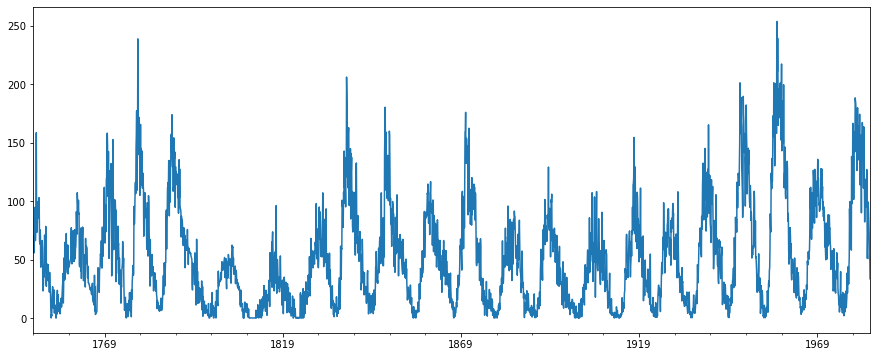

In [32]:
serie2.plot()
plt.show()

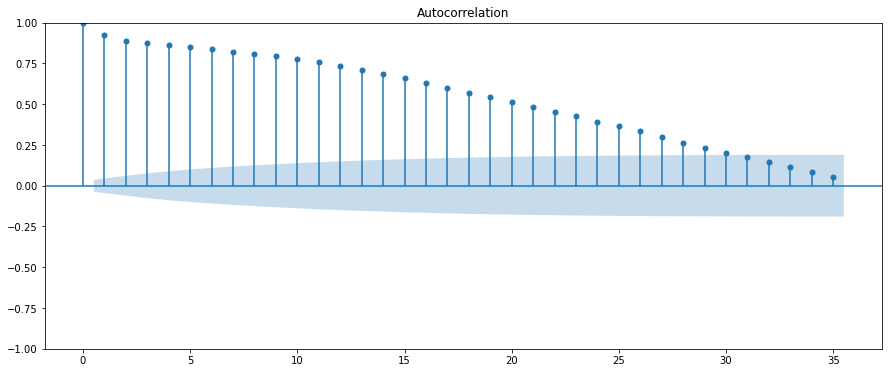

In [34]:
plot_acf(serie2)
plt.show()

Os lags, em sua maioria, fora da faixa do IC. Os dados estão autocorrelacionados, existe uma autocorrelação. Muitas vezes isso não é legal para montar o modelo. É melhor ter o modelo atendendo alguns pressupostos doque não ter nada.

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


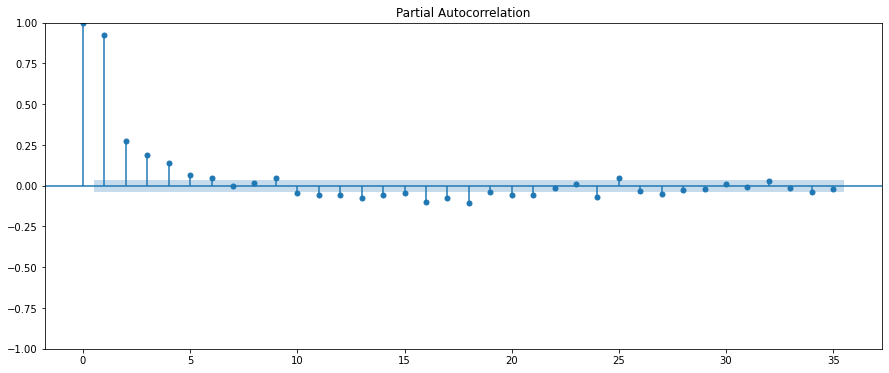

In [35]:
plot_pacf(serie2)
plt.show()

Grande sazonalidade, grande repetições de valores

## Terceiro caso: dados do Python sobre Manchas Solares

Dados anais (1700-2008) sobre manchas solares. Fonte: National Geophysical Data Center. É possível pesquisar os datasets do statsmodels indo no site da **biblioteca statsmodels.org** "Avaible Datasets"

In [36]:
import statsmodels.api as sm

In [37]:
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [38]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = manchas_solares['YEAR'])

<AxesSubplot:xlabel='YEAR'>

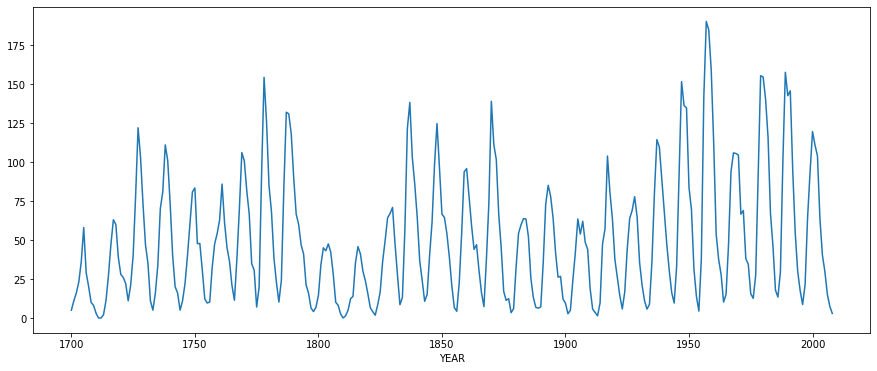

In [39]:
serie3.plot()

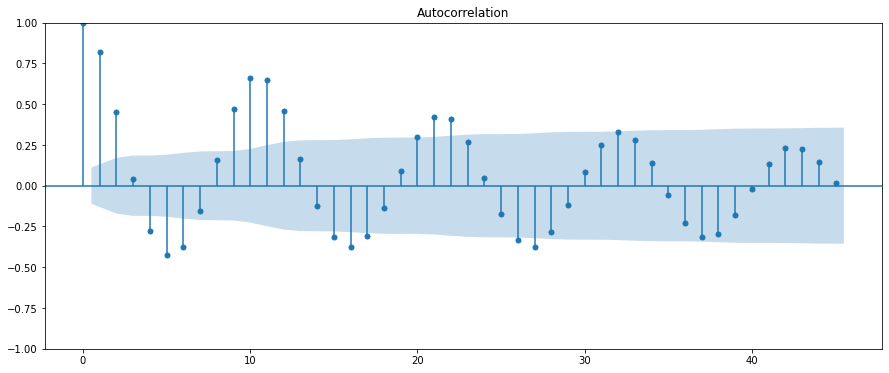

In [41]:
plot_acf(serie3, lags=45)
plt.show()

Os lags inicias apontam para uma correlação tanto positiva quanto negativa. Porém, logo depois, cai no IC e fica não significante estatísticamente

C:\Users\Appleack\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


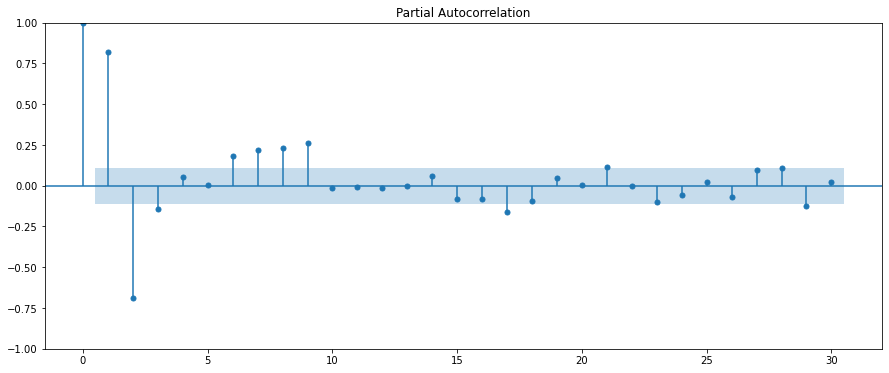

In [42]:
plot_pacf(serie3, lags=30)
plt.show()

Como é autocorrelação parcial, estamos vendo uma correlação mais dispersa, como já explicado anteriormente